In [2]:
import numpy as np

## matplotlib.pyplot 을 이용해 data를 visualize 하기

In [3]:
x = np.arange(1, 20, 2)
print(x.shape)
print(x)

def f(x) :
    return 2*x

y = f(x)
print(y.shape)
print(y)

(10,)
[ 1  3  5  7  9 11 13 15 17 19]
(10,)
[ 2  6 10 14 18 22 26 30 34 38]


matplotlib.pyplot 공식 document 웹페이지 : https://matplotlib.org/stable/api/pyplot_summary.html#module-matplotlib.pyplot

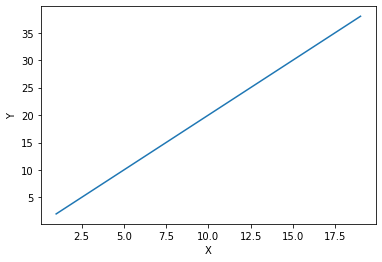

In [4]:
import matplotlib.pyplot as plt
#plt.scatter(x, y, color="red")
plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Exercise1

아래와 같은 그래프를 그려보세요

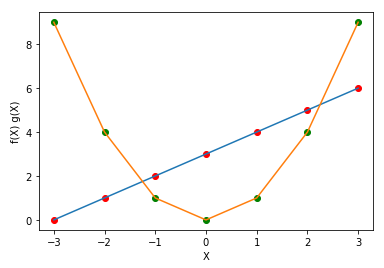

In [5]:
# Excercise1


plt.show()

# Data Preprocessing(sklearn, pandas)

In [6]:
from sklearn import datasets

house = datasets.load_boston()
print(house.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [7]:
x_data = house.data
y_data = house.target
print(x_data.shape, y_data.shape)   # (506, 13) (506,)

(506, 13) (506,)


In [8]:
import pandas as pd
df = pd.DataFrame(house.data, columns=house.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [9]:
df['target'] = y_data
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

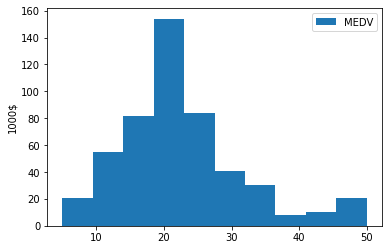

In [10]:
unit = 1000

plt.hist(df['target'])
plt.legend(['MEDV'])
plt.ylabel('{}$'.format(unit))
plt.show()

## Excercise2

아래와 같은 그래프를 그려보세요 (HINT : plt.hist 함수의 parameter에 bins 와 alpha를 추가해보세요)

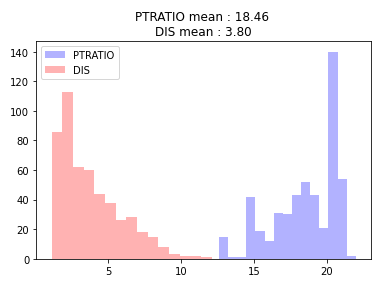

In [11]:
# Excercise2


plt.show()

## Data Preprocessing(Normalization, Standardization)

In [12]:
def func_minmaxscale (number, col):
    mx = x_data[:,col].max()
    mn = x_data[:,col].min()
    
    return (number-mn)/(mx-mn)

func_minmaxscale(x_data[0,2],2)

0.06781524926686218

sklearn document 웹페이지 : https://scikit-learn.org/stable/modules/classes.html  
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

In [13]:
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()
x_scaler.fit(x_data)
x_data_scaled = x_scaler.transform(x_data)
df_minmax = pd.DataFrame(x_data_scaled, columns=house.feature_names)
df_minmax['y'] = house.target
df_minmax.head()

CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   

        RAD       TAX   PTRATIO         B     LSTAT     y  
0  0.000000  0.208015  0.287234  1.000000  0.089680  24.0  
1  0.043478  0.104962  0.553191  1.000000  0.204470  21.6  
2  0.043478  0.104962  0.553191  0.989737  0.063466  34.7  
3  0.086957  0.066794  0.648936  0.994276  0.033389  33.4  
4  0.086957  0.066794  0.648936  1.000000  0.099338  36.2

In [14]:
def func_std(data):
    m = data.mean()
    s = data.std()

    return (data-m)/s

print(x_data_scaled[:5, 0])
print(func_std(x_data_scaled[:5, 0]))

[0.         0.00023592 0.0002357  0.0002928  0.00070507]
[-1.2834352  -0.25317266 -0.25415433 -0.00481018  1.79557237]


## Excercise3

위의 func_std 와 같은 역할을 하는 StandardScaler를 활용하여 df_normalized 라는 DataFrame을 만들어 보세요.
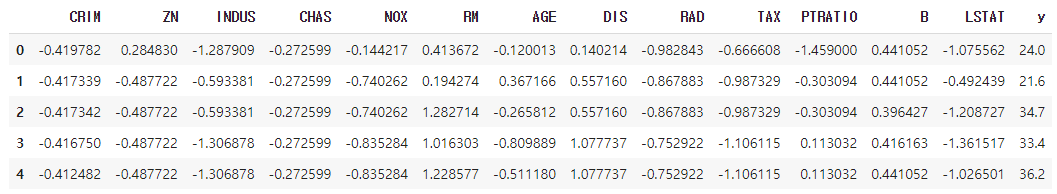

In [15]:
# Excercise3

from sklearn.preprocessing import StandardScaler



## Standard Normal Distribution

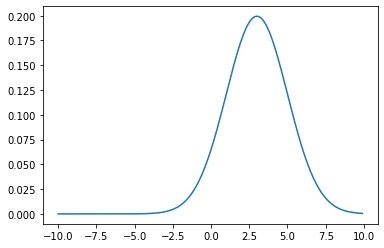

In [16]:
# Gaussian
mu = 3
sigma = 2

x = np.arange(-10, 10, 0.1)
y = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x-mu)**2 / (2 * sigma**2))

plt.plot(x,y)
plt.show()

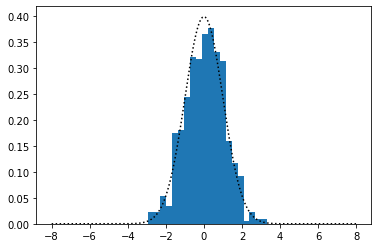

In [17]:
import torch
mu = 0
sigma = 1
x = np.arange(-8, 8, 0.01)
y = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x-mu)**2 / (2 * sigma**2))
plt.plot(x, y, linestyle = ':', color = 'k')

t = torch.randn(1000)
plt.hist(t, bins = 20, density= True)
plt.show()

## Excercise4

아래와 같은 그래프를 그려보세요

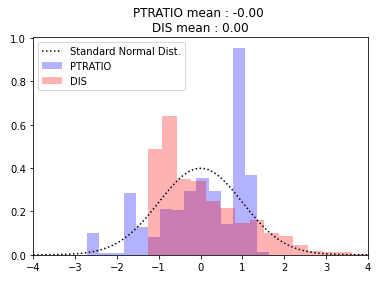

In [18]:
# Excercise4


plt.show()